In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

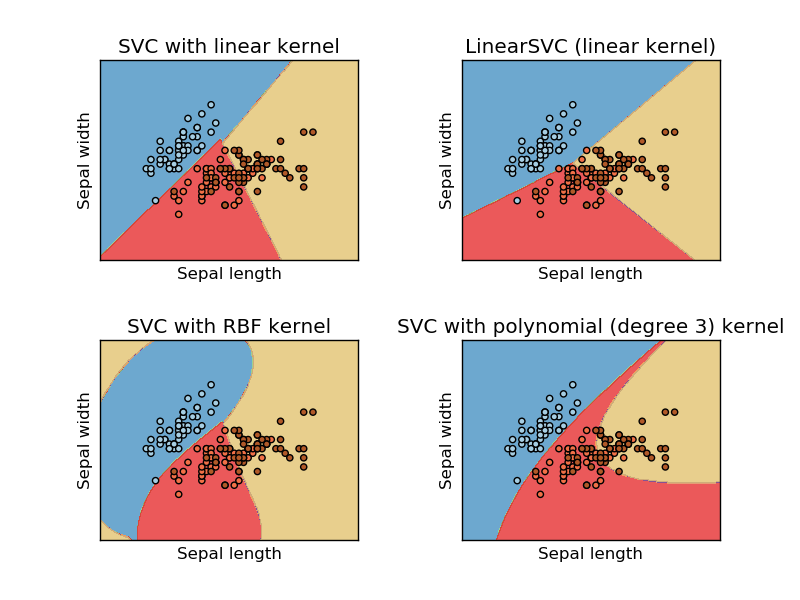

# Carga de datos

In [2]:
url='https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv'
df = pd.read_csv(url,sep=',')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# EDA

In [3]:
df.shape

(17898, 9)

In [4]:
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
# remover los espacios iniciales
df.columns = df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
# renombrar columnas
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [7]:
# balance de clases
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [8]:
df['target_class'].value_counts()/np.float(len(df))

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# Nulos

In [9]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

# Outliers

In [10]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


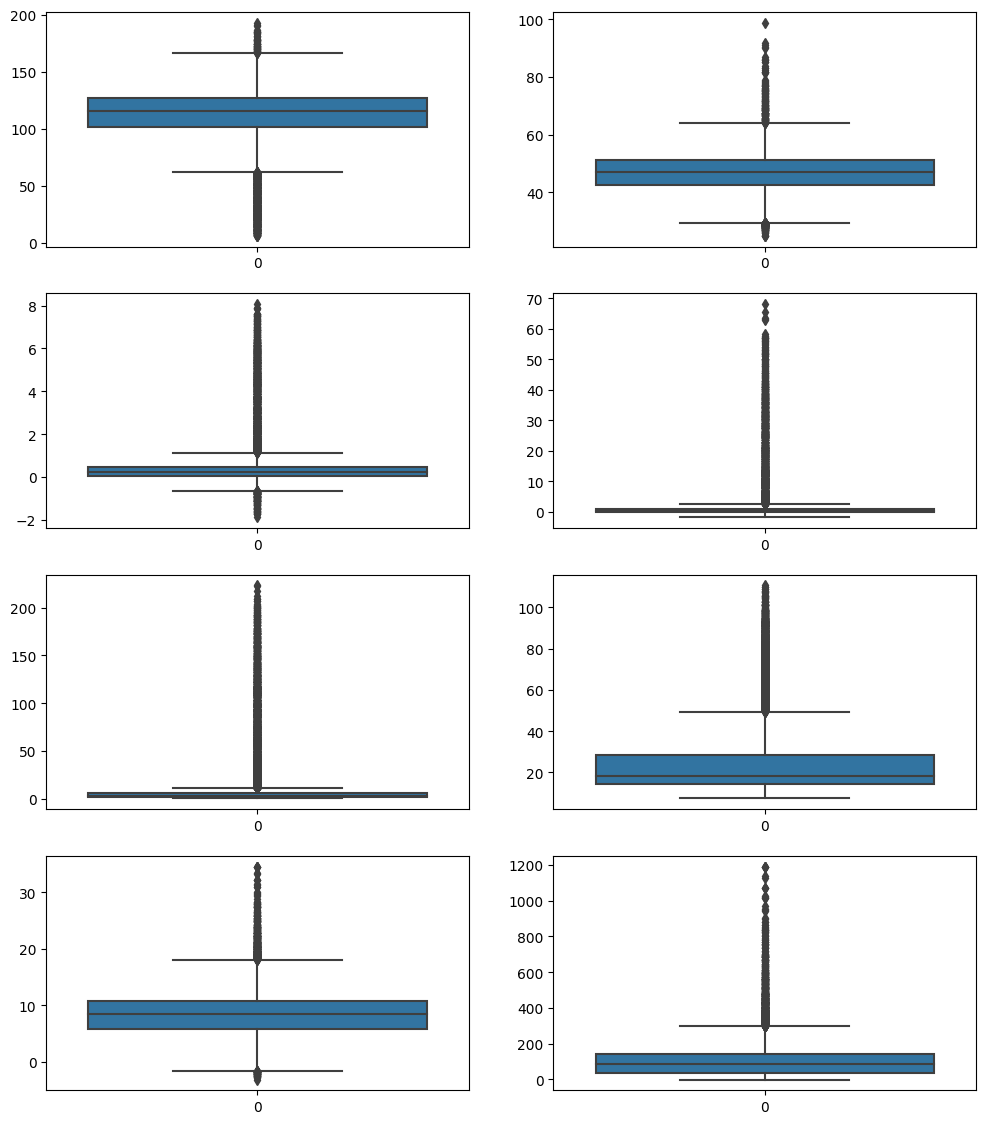

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,14))
for i in range(len(df.columns)):
  if i==8:
    pass
  else:
    plt.subplot(4,2,i+1)
    sns.boxplot(df.iloc[:,i])

**Manejar valores atípicos con SVM**

Hay 2 variantes de SVM. Son la variante de hard margin de SVM y la variante de soft margin de SVM.

**Hard margin** no se ocupa de los valores atípicos. En este caso, queremos encontrar el hiperplano con el margen máximo de modo que cada punto de entrenamiento se clasifique correctamente con un margen de al menos 1. **Esta técnica no maneja bien los valores atípicos**.

**Soft margin** En este caso, podemos tener algunos puntos clasificados incorrectamente o clasificados con un margen. Pero por cada uno de esos puntos, tenemos que pagar una penalización en forma de parámetro C, que controla los valores atípicos. **Una C bajo implica que estamos permitiendo más valores atípicos y una C alto implica menos valores atípicos**.

Dado que el conjunto de datos contiene valores atípicos, el valor de **C debe ser alto** mientras se entrena el modelo.

# Separar train /test

In [12]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)

In [14]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

# Feature Scaling

In [15]:
cols = X_train.columns

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,-0.633977,-0.981907,-0.033070,-0.078151,-0.370148,-0.630492,0.700511,0.480328
1,0.129382,0.151334,0.019879,-0.183783,-0.191325,0.352985,-0.710251,-0.739566
2,-0.212394,0.110565,0.056657,-0.185460,-0.350010,-0.481438,0.456622,0.165172
3,0.756274,-0.164655,-0.351147,-0.203179,-0.269115,0.083891,-0.392282,-0.575654
4,0.941783,0.766947,-0.398790,-0.325647,-0.343259,-0.377761,0.153095,-0.156990


# SVC con hyperparametros por defecto

In [20]:
SVC?

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy con hyperparametros defecto: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy con hyperparametros defecto: 0.9810


In [19]:
svc=SVC(C=100.0,kernel='rbf') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy con rbf kernel y C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy con rbf kernel y C=100.0 : 0.9821


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3242   10]
 [  54  274]]

True Positives(TP) =  3242

True Negatives(TN) =  274

False Positives(FP) =  10

False Negatives(FN) =  54


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.96      0.84      0.90       328

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580

